In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [2]:
df_circuits = pd.read_csv('circuits.csv')
df_lap_times = pd.read_csv('lap_times.csv')
df_races = pd.read_csv('races.csv')
df_circuits.head()



,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [3]:
df_lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [4]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


## 1) Fastest laps on a circut each year:

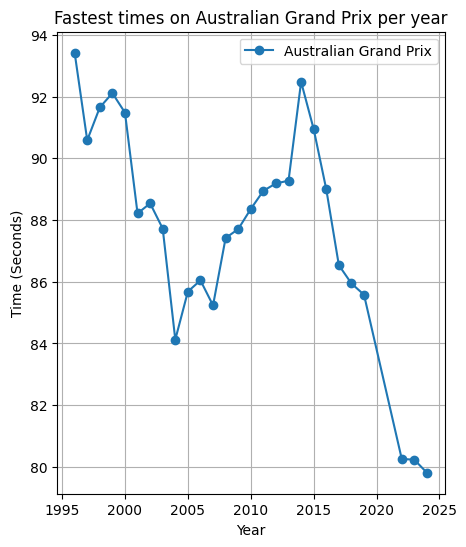

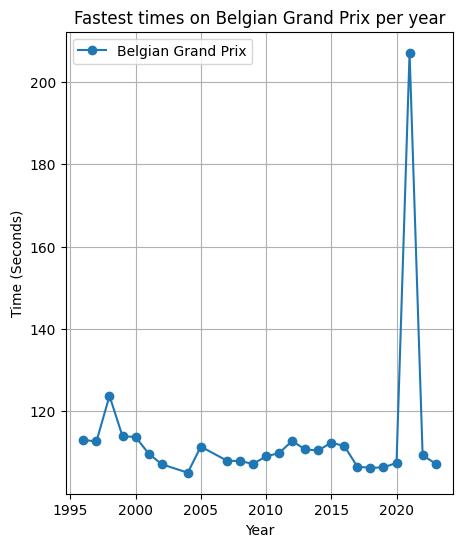

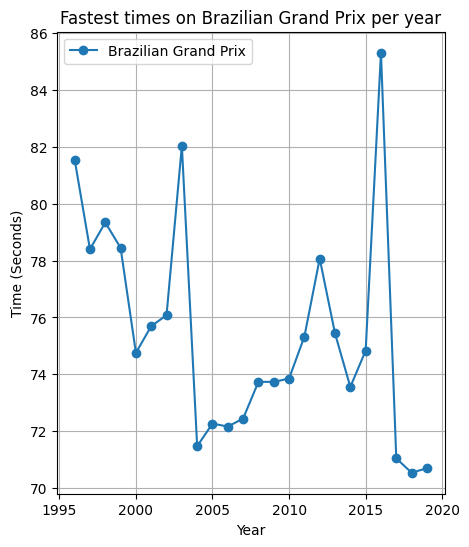

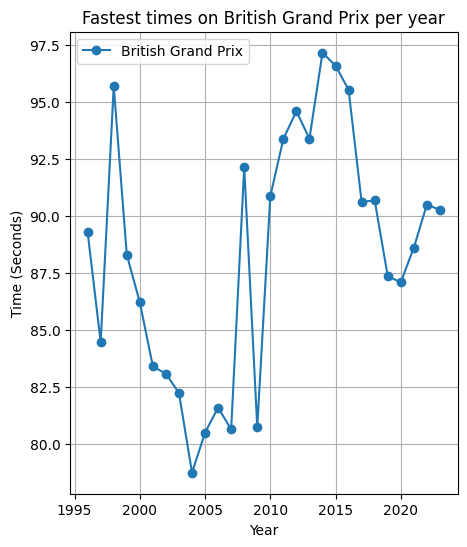

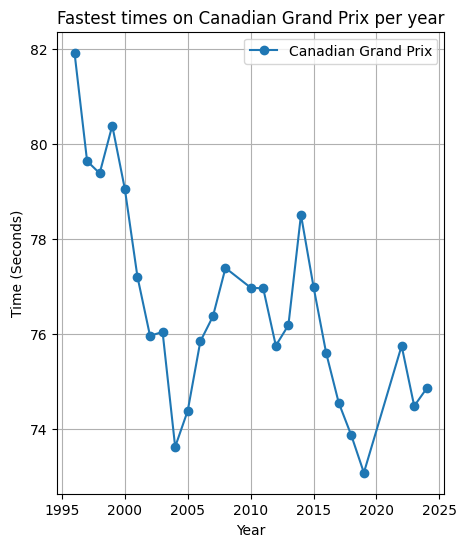

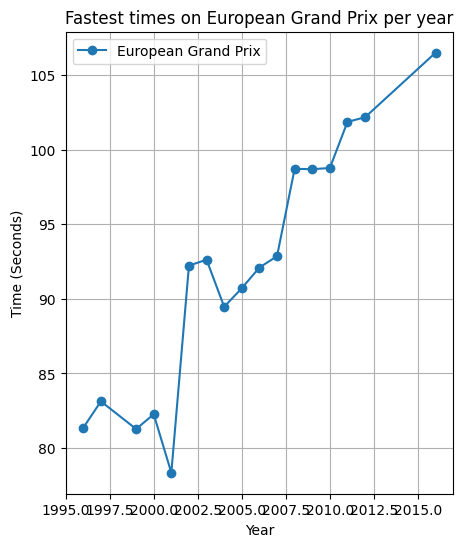

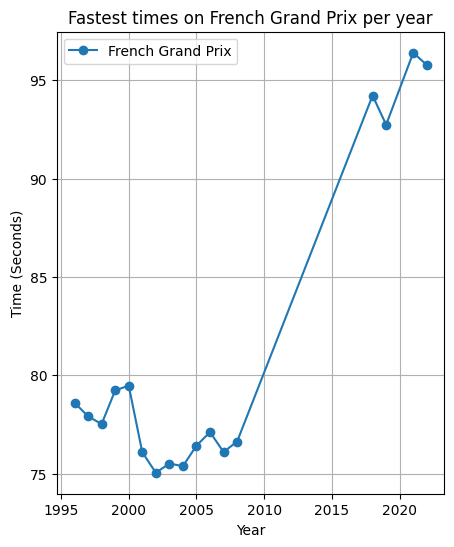

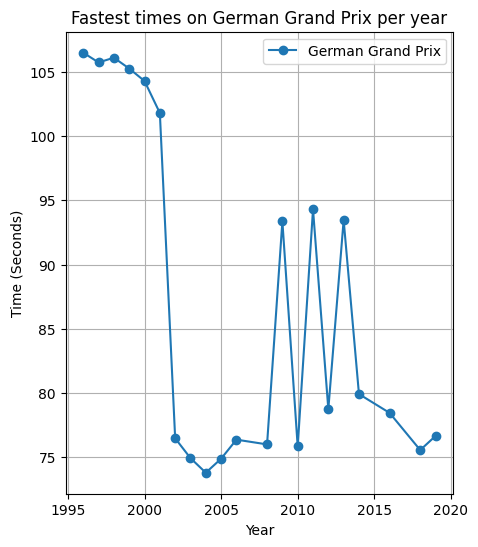

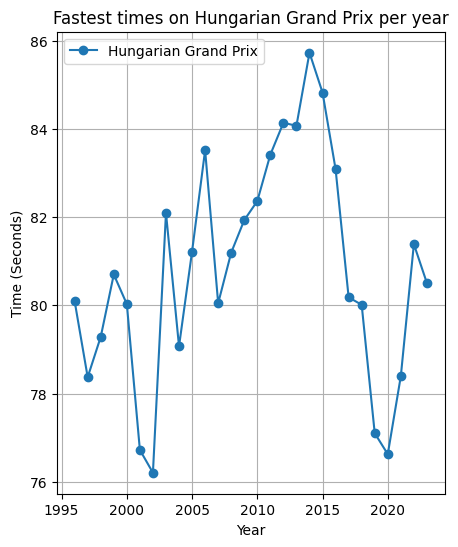

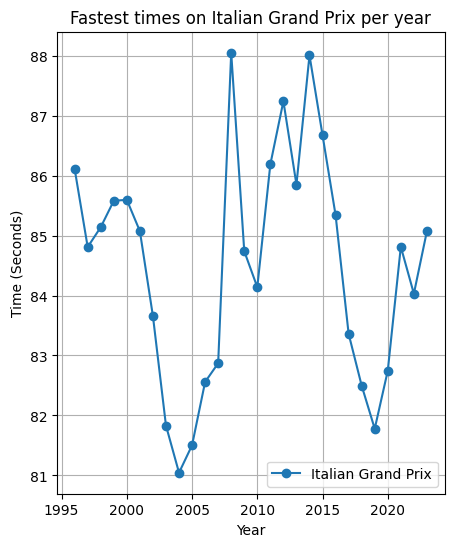

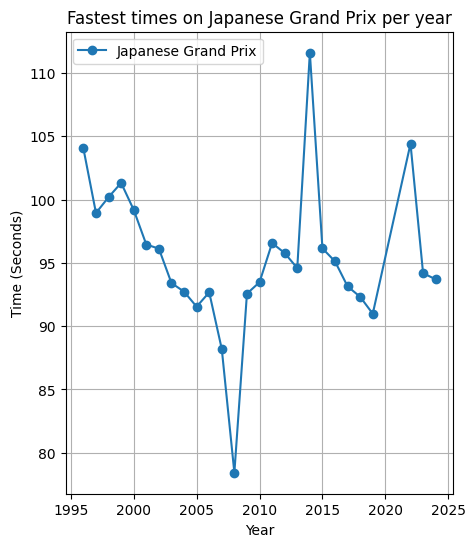

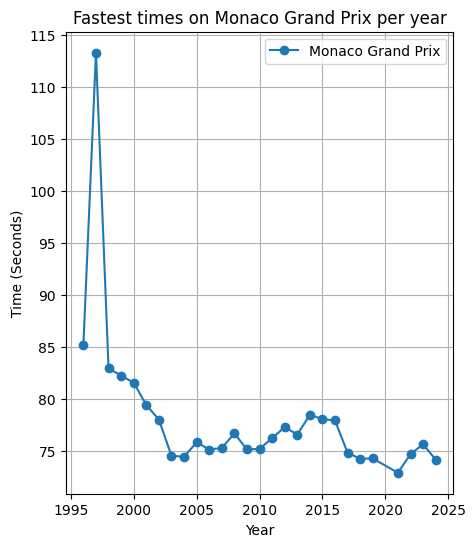

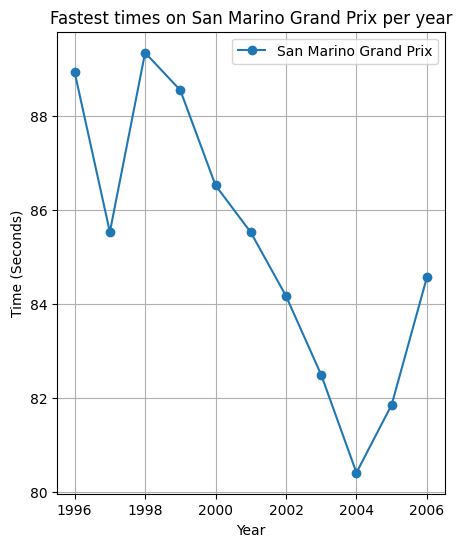

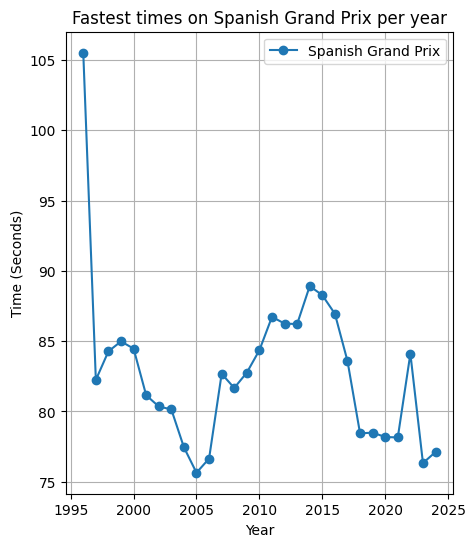

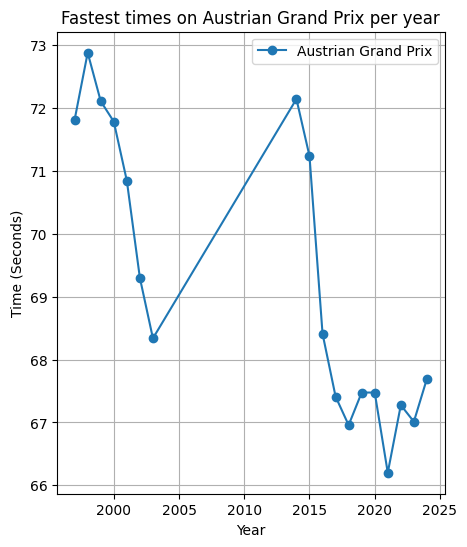

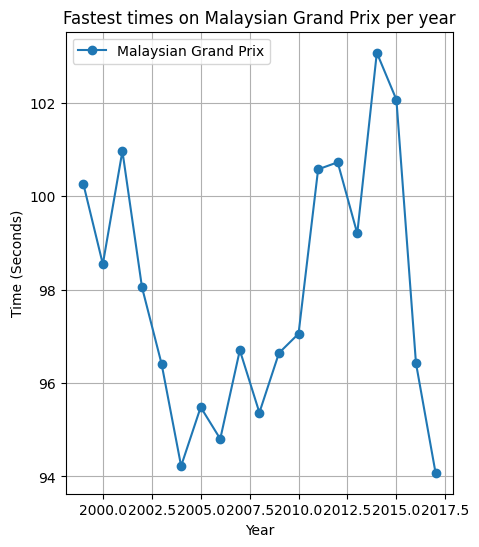

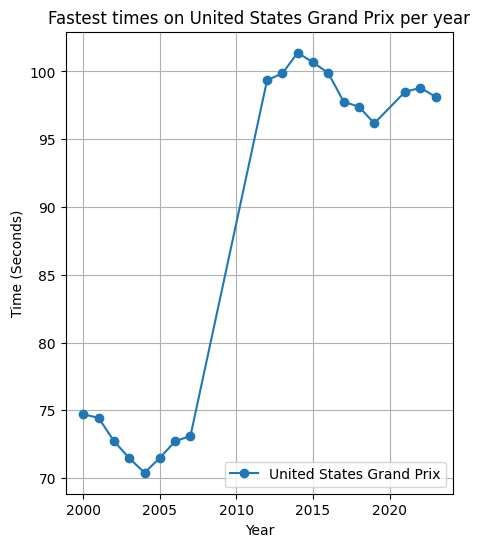

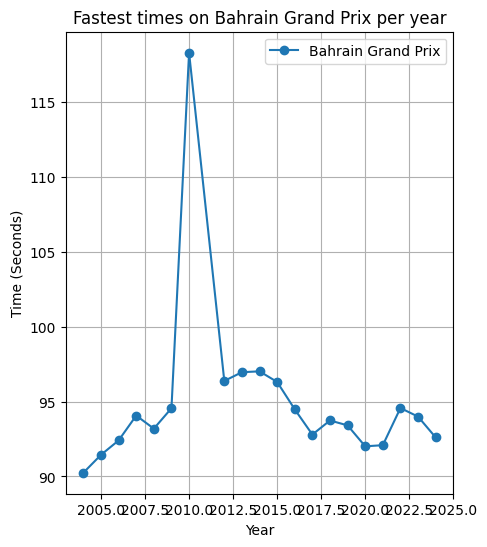

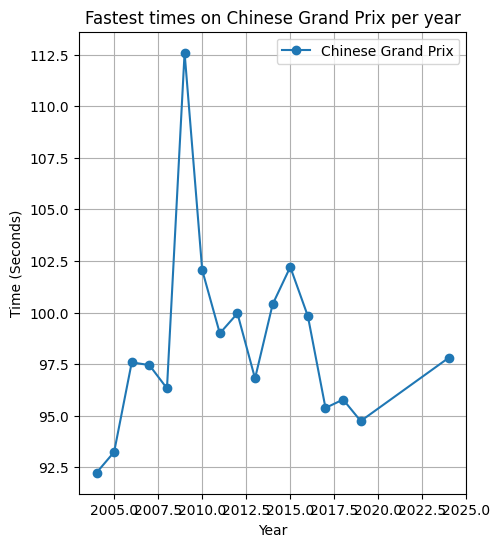

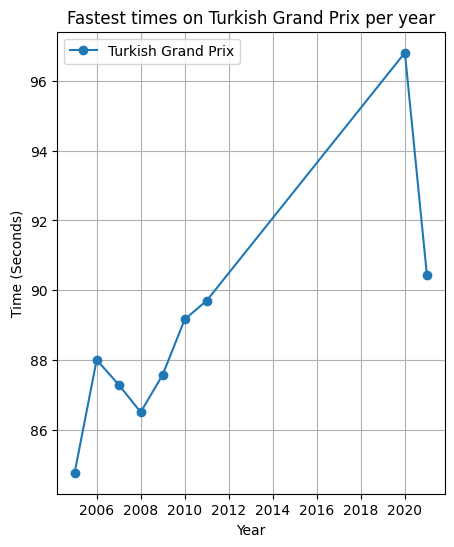

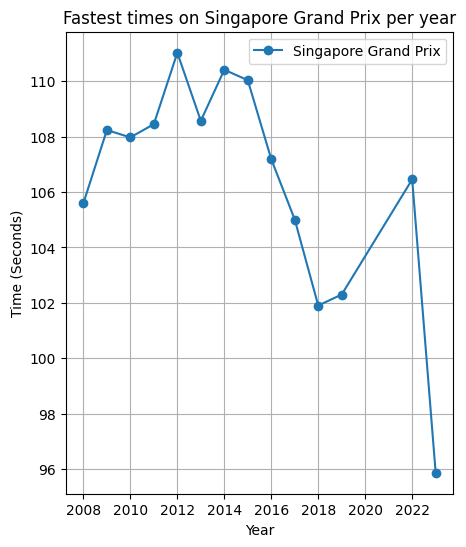

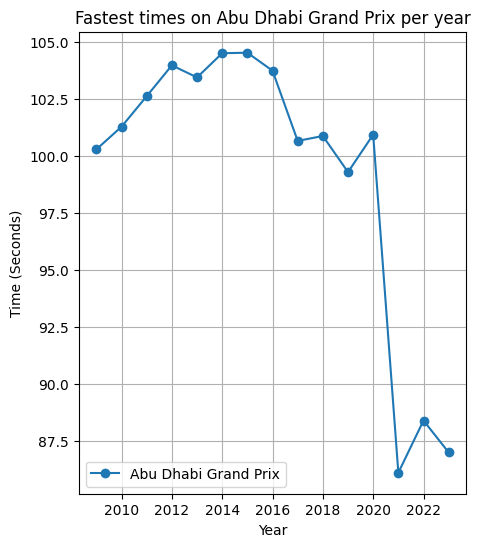

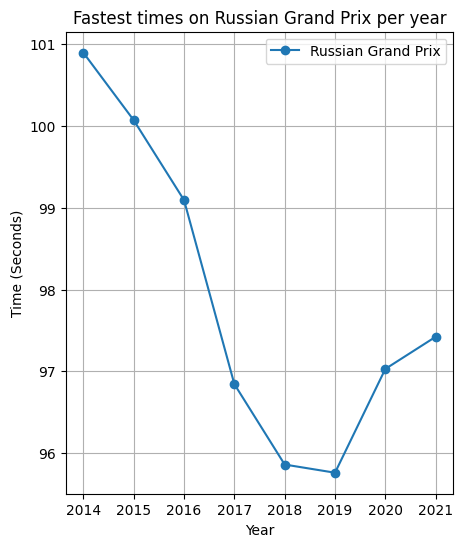

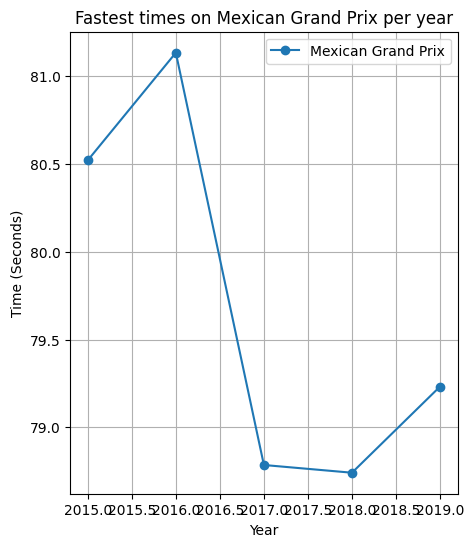

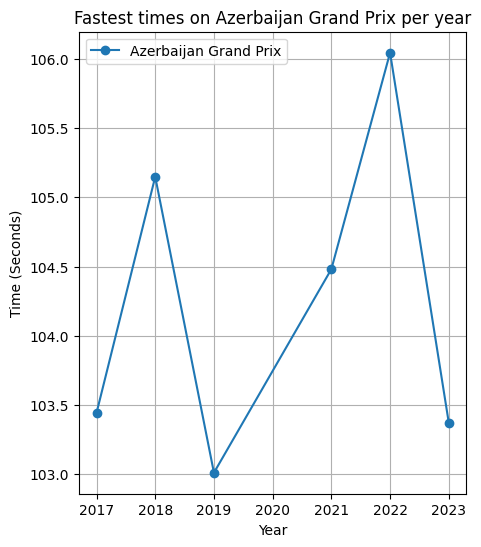

In [5]:
df = pd.merge(df_races, df_lap_times, on="raceId")
df = pd.merge(df, df_circuits, on="circuitId")

df_columns = df[["year", "name_x", "milliseconds"]]

df_fastest_lap_per_year = df_columns.groupby(["year", "name_x"]).min("milliseconds").reset_index()

df_fastest_lap_per_year = df_fastest_lap_per_year.groupby("name_x").filter(lambda x: len(x) > 4)

unique_circuits = df_fastest_lap_per_year['name_x'].unique()


for circuit in unique_circuits:
    circuit_data = df_fastest_lap_per_year[df_fastest_lap_per_year['name_x'] == circuit]
    
    plt.figure(figsize=(5, 6))
    plt.plot(circuit_data['year'], circuit_data['milliseconds'] / 1000, marker='o', label=circuit)
    plt.title(f'Fastest times on {circuit} per year')
    plt.xlabel('Year')
    plt.ylabel('Time (Seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

#
* I think a good assumption would be that the fastest lap should go down with each year considering the cars are getting better every season as well as the drivers. We can see however, that it is not eactly the case. That can be due to many factors like for example the weather om the race day,  or the track changes over the years. 
* The fastest time on each circuit also depends on the lenght of the circuit, any track elevations, the number of turns, or number of straights amongs other factors. 
* Some GP are not existant anymore so the year count ends sooner or for some there is missing data.


## 2) The number of wins per driver:

In [6]:
df_drivers = pd.read_csv('drivers.csv')
df_results = pd.read_csv('results.csv')

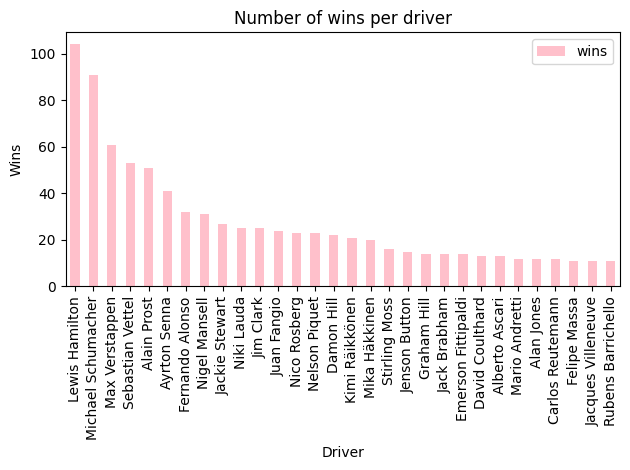

In [45]:
df = pd.merge(df_drivers, df_results, on="driverId")

df["driver_name"] = df["forename"] + " " + df["surname"]
df_columns = df[["driver_name", "position"]]


df_wins = df_columns[df_columns["position"] == "1"].groupby("driver_name").size().reset_index(name='wins')

df_wins_per_driver = df_wins[df_wins["wins"]>10]
df_wins_per_driver = df_wins_per_driver.sort_values(by="wins", ascending=False)

df_wins_per_driver.plot(kind="bar", x="driver_name", y="wins", color="pink")

plt.title("Number of wins per driver")
plt.xlabel("Driver")
plt.ylabel("Wins")
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [46]:
df_wins_per_driver.head()

,driver_name,wins
66,Lewis Hamilton,104
75,Michael Schumacher,91
74,Max Verstappen,61
105,Sebastian Vettel,53
0,Alain Prost,51


## After getting the number of wins per driver let's see the number of points in total per driver (15):

In [8]:
df_driver_standings = pd.read_csv('driver_standings.csv')


In [39]:
top_15_points = (
    df.groupby(['driver_name'])['points']
    .sum()
    .nlargest(15)
    .reset_index()
)
top_15_points.head()


,driver_name,points
0,Lewis Hamilton,4713.5
1,Sebastian Vettel,3098.0
2,Max Verstappen,2744.5
3,Fernando Alonso,2304.0
4,Kimi Räikkönen,1873.0


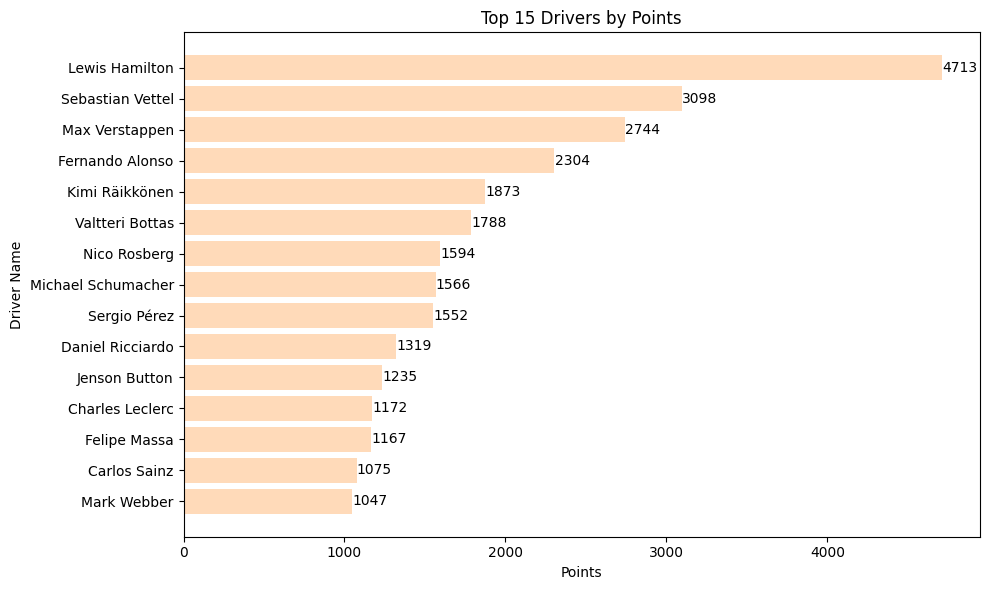

In [38]:
driver_names = top_15_points['driver_name']
points = top_15_points['points'].astype(int) 
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(y[i] + 1, i, str(y[i]), va='center') 

if __name__ == '__main__':
    plt.figure(figsize=(10, 6))
    plt.barh(driver_names, points, color='peachpuff')  
    plt.xlabel("Points")
    plt.ylabel("Driver Name")

    addlabels(driver_names, points)  

    plt.title("Top 15 Drivers by Points")
    plt.gca().invert_yaxis()  
    plt.tight_layout()

    plt.show()



##
* Comparing number of wins list and number of points we can see who shows more consistency within their driving. Obviously factors like number of years in the sport will play a role as well. We can see however, the same person on top of both lists Lewis Hamilton.
* To have a better idea of the points system in F1 : 1st-25pts, 2nd-18pts, 3rd-15pts, 4th-12pts, 5th-10pts, 6th-8pts, 7th-6pts, 8th-4pts, 9th-2pts, 10th-1pt. You might also be entiteled to a bonus point for fatsest lap, that is if they are within the top 10. 
* We can see with the previous graph of the number of wins we can see that the 104 wins secured him 2600 out of 4713 points (104x25).
* With that information, any driver finishing beyod place 10 does not get points.That makes some of the drivers score boards most impressive considering we are looking at different career lenghts and some eeptional drivers like Max Verstappen who hasn't finished outside of the points since the race in Spa, 2016. 